<a href="https://colab.research.google.com/github/SamukthaV/A-i-ttendance-register/blob/master/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#creating a model class that inherits a torch Module
class Model(nn.Module):
  def __init__(self,input=4,h1=9,h2=8,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(input,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [ ]:
torch.manual_seed(41)
model=Model()

In [23]:
#dataset importing
# I go for looking the .csv file in github and click on to raw then get the url
import pandas as pd
#url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df=pd.read_csv(url)

In [24]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [61]:
#replacing the categorical columns with numericals
df['variety']=df['variety'].replace('Setosa',0.0)
df['variety']=df['variety'].replace('Versicolor',1.0)
df['variety']=df['variety'].replace('Virginica',2.0)
X=df.drop('variety',axis=1)
y=df['variety']
X=X.values
y=y.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
print(X)
print(y)

In [63]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [64]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [65]:
criterion=nn.CrossEntropyLoss()
op=torch.optim.Adam(model.parameters(),lr=0.01)


In [66]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [80]:
#train the model
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'epochs ={i},loss = {loss}')
  op.zero_grad()
  loss.backward()
  op.step()



epochs =0,loss = 0.005432963836938143
epochs =10,loss = 0.005257843993604183
epochs =20,loss = 0.005088661797344685
epochs =30,loss = 0.004925090353935957
epochs =40,loss = 0.004767058417201042
epochs =50,loss = 0.004614382982254028
epochs =60,loss = 0.004466883838176727
epochs =70,loss = 0.004324445966631174
epochs =80,loss = 0.0041868845000863075
epochs =90,loss = 0.004054059740155935


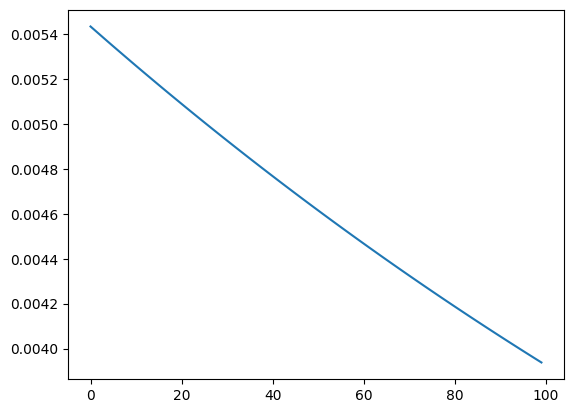

In [81]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses)